<a href="https://colab.research.google.com/github/vahadruya/Capstone_Regression_NYC_Taxi_Trip_Duration_Prediction/blob/main/Iterations_Notebooks_and_Results/PWHS_1010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iteration 5 - In this notebook, the **extrene_weather** and **store_and_fwd_flag** features have been dropped while **passenger_count** and **holiday** features have been dropped.

## Initial

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 1 - REGRESSION/Input data/'
df = pd.read_csv('NYC Taxi Data.csv', parse_dates = ['pickup_datetime', 'dropoff_datetime'])

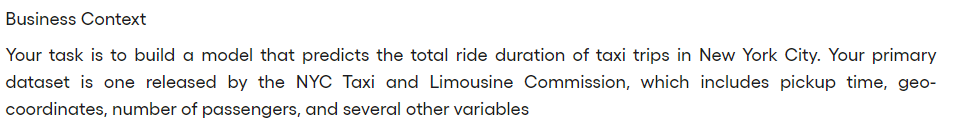

![image](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data = df.copy()

## Columns

### Dropoff datetime, ID

In [ ]:
((data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() - data['trip_duration']).value_counts()

0.000000e+00    1220647
1.136868e-13      82271
5.684342e-14      79253
2.842171e-14      33925
2.273737e-13      29992
1.421085e-14       6808
4.547474e-13       4090
7.105427e-15       1021
3.552714e-15        383
1.776357e-15        148
9.094947e-13         65
7.275958e-12         20
3.637979e-12         15
1.818989e-12          4
2.328306e-10          2
dtype: int64

In [ ]:
data['id'].nunique()

1458644

In [ ]:
data = data.drop(['id', 'dropoff_datetime'], axis = 1)

### Pickup, Dropoff coordinates

In [ ]:
# Containing within the box of nYC

data = data[
    data['pickup_latitude'].between(40.46, 40.93) &
    data['dropoff_latitude'].between(40.46, 40.93) &
    data['pickup_longitude'].between(-74.3, -73.65) &
    data['dropoff_longitude'].between(-74.3, -73.65)
]

### Holidays

In [ ]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import holidays

In [ ]:
nyc_holidays = holidays.UnitedStates(state = 'NY', years = [2016])

In [ ]:
nyc_holidays_ = list(nyc_holidays.keys())
nyc_holidays_

[datetime.date(2016, 1, 1),
 datetime.date(2016, 1, 18),
 datetime.date(2016, 2, 12),
 datetime.date(2016, 2, 15),
 datetime.date(2016, 5, 30),
 datetime.date(2016, 7, 4),
 datetime.date(2016, 9, 5),
 datetime.date(2016, 10, 10),
 datetime.date(2016, 11, 8),
 datetime.date(2016, 11, 11),
 datetime.date(2016, 11, 24),
 datetime.date(2016, 12, 25),
 datetime.date(2016, 12, 26)]

In [ ]:
data['holiday'] = data['pickup_datetime'].dt.date.isin(nyc_holidays).map({True : 1, False : 0})

In [ ]:
data[data['holiday'] == 1]

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,holiday
44,2,2016-02-12 07:41:56,1,-73.979645,40.739632,-73.994728,40.723495,N,559,1
52,2,2016-02-15 09:25:15,6,-73.977753,40.754631,-74.001678,40.756420,N,634,1
121,1,2016-01-18 11:13:59,1,-73.951576,40.766468,-73.960213,40.760540,N,297,1
164,1,2016-01-01 10:45:24,1,-74.001610,40.740810,-73.996223,40.725903,N,383,1
190,2,2016-02-15 17:52:27,5,-74.007500,40.740952,-74.016647,40.704910,N,586,1
...,...,...,...,...,...,...,...,...,...,...
1458575,2,2016-05-30 03:52:41,1,-74.003891,40.751667,-74.001350,40.746571,N,206,1
1458602,1,2016-05-30 14:42:12,1,-74.015457,40.708027,-74.015396,40.708138,N,26,1
1458623,1,2016-01-18 20:35:30,1,-73.991081,40.737408,-73.987671,40.722622,N,554,1
1458628,2,2016-05-30 03:08:19,2,-73.988632,40.721378,-73.975548,40.728519,N,351,1


In [ ]:
data[data['holiday'] == 1]['trip_duration'].mean(), data[data['holiday'] == 1]['trip_duration'].median(), data[data['holiday'] == 0]['trip_duration'].mean(), data[data['holiday'] == 0]['trip_duration'].median(), data['trip_duration'].mean(), data['trip_duration'].median()

(858.7513415338892, 583.0, 961.0434775572922, 664.0, 958.4933444105466, 662.0)

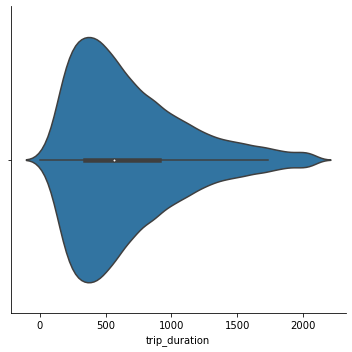

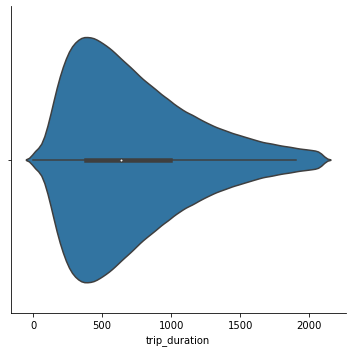

In [ ]:
sns.catplot(data = data[(data['holiday'] == 1) & (data['trip_duration'] < 2100)], x = 'trip_duration', kind = 'violin')
sns.catplot(data = data[(data['holiday'] == 0) & (data['trip_duration'] < 2100)], x = 'trip_duration', kind = 'violin')

### Weather

https://www.weather.gov/okx/stormevents

In [ ]:
dates = ['0110', '0113', '0117', '0123',
        '0205', '0208', '0215', '0216',
        '0224', '0225', '0314', '0315',
        '0328', '0329', '0403', '0404',
        '0530', '0628']

weather_event = ['2016' + x for x in dates]

In [ ]:
data.sort_values('pickup_datetime')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,holiday
96469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849,1
223872,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294,1
713067,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408,1
652463,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280,1
722901,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736,1
...,...,...,...,...,...,...,...,...,...,...
853710,2,2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,N,472,0
419031,1,2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,N,754,0
1008720,1,2016-06-30 23:59:10,2,-73.873093,40.774097,-73.926704,40.856739,N,2546,0
405743,2,2016-06-30 23:59:37,5,-73.998291,40.722618,-73.971779,40.762470,N,1442,0


In [ ]:
# weather_event = pd.Series(pd.to_datetime(weather_event, format = '%Y%m%d')).dt.date

# data['extreme_weather'] = data['pickup_datetime'].dt.date.isin(weather_event).map({True : 1, False : 0})

In [ ]:
# data['extreme_weather'].value_counts().values[1]/(data['extreme_weather'].value_counts().values[1]+data['extreme_weather'].value_counts().values[0])

In [ ]:
# sns.catplot(data = data[data['extreme_weather'] == 1], x = 'trip_duration', kind = 'violin')

# data[data['extreme_weather'] == 1]['trip_duration'].mean(), data[data['extreme_weather'] == 1]['trip_duration'].median(), data[data['extreme_weather'] == 0]['trip_duration'].mean(), data[data['extreme_weather'] == 0]['trip_duration'].median(), data['trip_duration'].mean(), data['trip_duration'].median()

### Pickup datetime -> other variables

In [ ]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday

In [ ]:
data['day_of_month'] = data['pickup_datetime'].dt.day

In [ ]:
data['month'] = data['pickup_datetime'].dt.month

In [ ]:
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [ ]:
data = data.drop(['pickup_datetime'], axis = 1)

### passenger count

In [ ]:
data['passenger_count'].value_counts()

1    1032787
2     210176
5      78058
3      59862
6      48322
4      28378
0         60
7          2
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
data = data[~data['passenger_count'].isin([0, 7, 8, 9])]
# data = data.drop('passenger_count', axis = 1)

### Store_and_fwd_flag

In [ ]:
data['store_and_fwd_flag'].value_counts()

N    1449562
Y       8021
Name: store_and_fwd_flag, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

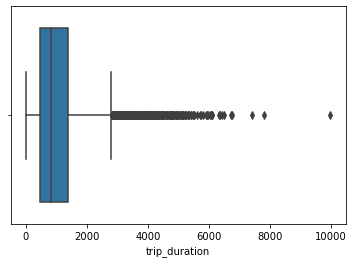

In [ ]:
sns.boxplot(data[data['store_and_fwd_flag'] == 'Y']['trip_duration'].reset_index(drop = True))

In [ ]:
# data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N':0, 'Y':1})
data = data.drop('store_and_fwd_flag', axis = 1)

### distance and trip_duration

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine
data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,holiday,day_of_week,day_of_month,month,hour_of_day
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,0,14,3,17
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,0,6,12,6,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,0,1,19,1,11
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,0,2,6,4,19
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,0,5,26,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778,0,4,8,4,13
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655,0,6,10,1,7
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,764,0,4,22,4,6
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373,0,1,5,1,15


In [ ]:
def calculate_distance(row):
    coords1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(coords1, coords2)

In [ ]:
data['distance'] =  data.apply(lambda x: calculate_distance(x), axis=1)

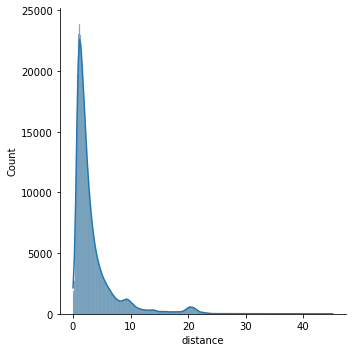

In [ ]:
sns.displot(data['distance'], kde = True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

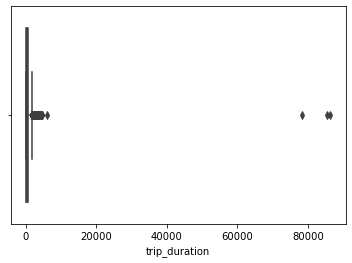

In [ ]:
sns.boxplot(data[data['distance'] == 0]['trip_duration'].reset_index(drop = True))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

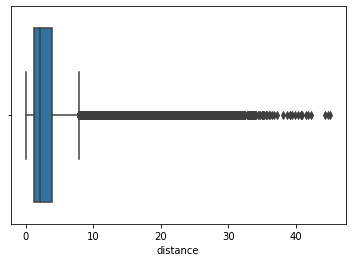

In [ ]:
sns.boxplot(data['distance'])

In [ ]:
td_iqr = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
max_q3 = data['trip_duration'].quantile(0.75) + 1.5*td_iqr
max_q3

2089.5

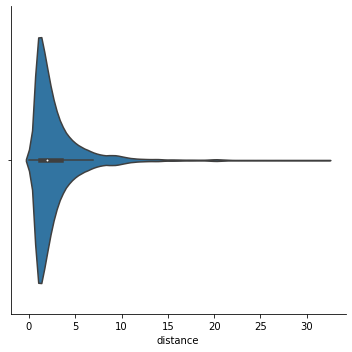

In [ ]:
sns.catplot(data = data[data['trip_duration'] <= max_q3], x = 'distance', kind = 'violin')

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

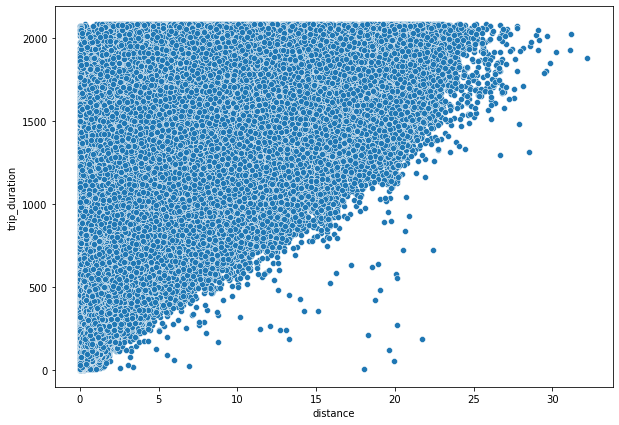

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'distance', y = 'trip_duration', data = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)])

In [ ]:
dat1 = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)]
dat2 = data[data['trip_duration'] <= max_q3]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

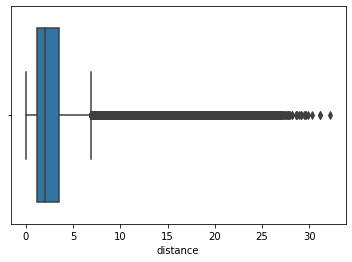

In [ ]:
sns.boxplot(dat2['distance'])

## Variable transformation and scaling

### transform

In [ ]:
dat1t = dat1.copy()
dat2t = dat2.copy()

In [ ]:
dat1t['trip_duration'] = np.sqrt(dat1t['trip_duration'])
dat2t['trip_duration'] = np.sqrt(dat2t['trip_duration'])

In [ ]:
dat1t['distance'] = np.sqrt(dat1t['distance'])
dat2t['distance'] = np.sqrt(dat2t['distance'])

In [ ]:
dat1t

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,holiday,day_of_week,day_of_month,month,hour_of_day,distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,21.330729,0,0,14,3,17,1.224142
1,1,1,-73.980415,40.738564,-73.999481,40.731152,25.748786,0,6,12,6,0,1.343693
3,2,1,-74.010040,40.719971,-74.012268,40.706718,20.712315,0,2,6,4,19,1.218811
4,2,1,-73.973053,40.793209,-73.972923,40.782520,20.856654,0,5,26,3,13,1.090225
5,2,6,-73.982857,40.742195,-73.992081,40.749184,21.047565,0,5,30,1,22,1.048305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,27.892651,0,4,8,4,13,1.106834
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,25.592968,0,6,10,1,7,2.459643
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,27.640550,0,4,22,4,6,2.797252
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,19.313208,0,1,5,1,15,1.045259


### split

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
X1 = dat1.drop('trip_duration', axis = 1)
Y1 = dat1['trip_duration']

X2 = dat2.drop('trip_duration', axis = 1)
Y2 = dat2['trip_duration']

X1t = dat1t.drop('trip_duration', axis = 1)
Y1t = dat1t['trip_duration']

X2t = dat2t.drop('trip_duration', axis = 1)
Y2t = dat2t['trip_duration']

In [ ]:
rs = 8

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = rs)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = rs)

X1t_train, X1t_test, Y1t_train, Y1t_test = train_test_split(X1t, Y1t, test_size = 0.2, random_state = rs)

X2t_train, X2t_test, Y2t_train, Y2t_test = train_test_split(X2t, Y2t, test_size = 0.2, random_state = rs)

### scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler1 = StandardScaler()
X1s_train = scaler1.fit_transform(X1_train)
X1s_test = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2s_train = scaler2.fit_transform(X2_train)
X2s_test = scaler2.transform(X2_test)

scaler1t = StandardScaler()
X1ts_train = scaler1t.fit_transform(X1t_train)
X1ts_test = scaler1t.transform(X1t_test)

scaler2t = StandardScaler()
X2ts_train = scaler2t.fit_transform(X2t_train)
X2ts_test = scaler2t.transform(X2t_test)

## reference - datacouples

In [ ]:
# # Couples:

# (X1_train, Y1_train)
# (X2_train, Y2_train)
# (X1t_train, Y1t_train)
# (X2t_train, Y2t_train)

# (X1s_train, Y1_train)
# (X2s_train, Y2_train)
# (X1ts_train, Y1t_train)
# (X2ts_train, Y2t_train)

In [ ]:
# input_names = {'s1': [X1_train, X1_test, Y1_train, Y1_test],
#                's2': [X2_train, X2_test, Y2_train, Y2_test],
#                's1t': [X1t_train, X1t_test, Y1t_train, Y1t_test],
#                's2t': [X2t_train, X2t_test, Y2t_train, Y2t_test],
#                's1s': [X1s_train, X1s_test, Y1_train, Y1_test],
#                's2s': [X2s_train, X2s_test, Y2_train, Y2_test],
#                's1ts': [X1ts_train, X1ts_test, Y1t_train, Y1t_test],
#                's2ts': [X2ts_train, X2ts_test, Y2t_train, Y2t_test],
#                }

input_names = {
            's1t': [X1t_train, X1t_test, Y1t_train, Y1t_test],
            's2t': [X2t_train, X2t_test, Y2t_train, Y2t_test],
            's1ts': [X1ts_train, X1ts_test, Y1t_train, Y1t_test]
            }

## Model implementation

### initial

In [ ]:
sns.set()

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate_model(y_true, y_pred, X_true):
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r2 = r2_score(y_true, y_pred)
  adj_r2 = 1 - (1 - r2) * ((X_true.shape[0] - 1) / (X_true.shape[0] - X_true.shape[1] - 1))
  return mse, rmse, r2, adj_r2

In [ ]:
score_names = ['mse_train', 'rmse_train', 'r2_train', 'adj_r2_train', 'mse_test', 'rmse_test', 'r2_test', 'adj_r2_test']
scores = dict()
for x in input_names:
  scores[x] = {'mse_train':[], 'rmse_train':[], 'r2_train':[], 'adj_r2_train':[], 'mse_test':[], 'rmse_test':[], 'r2_test':[], 'adj_r2_test':[]}

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Polynomial Regression', 'Lasso', 'Ridge', 'Elastic Net', 'XGBoost']

### 1. linear regression

In [ ]:
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  reg = LinearRegression()
  reg.fit(X_train, Y_train)
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Train scores = (28.321647541514633, 5.321808672013175, 0.5817654645531238, 0.5817609116673681)
Test scores = (28.283919117286796, 5.318262791296308, 0.5820974846812839, 0.5820792869848896)

Iteration s2t:
Train scores = (29.04114927053608, 5.388984066643367, 0.574218518678296, 0.5742139025896058)
Test scores = (28.88341112612899, 5.374328900070128, 0.5766503181125866, 0.5766319586342119)

Iteration s1ts:
Train scores = (28.321647541514622, 5.321808672013174, 0.5817654645531241, 0.5817609116673683)
Test scores = (28.283919117286782, 5.3182627912963065, 0.5820974846812841, 0.5820792869848899)



In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 0
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

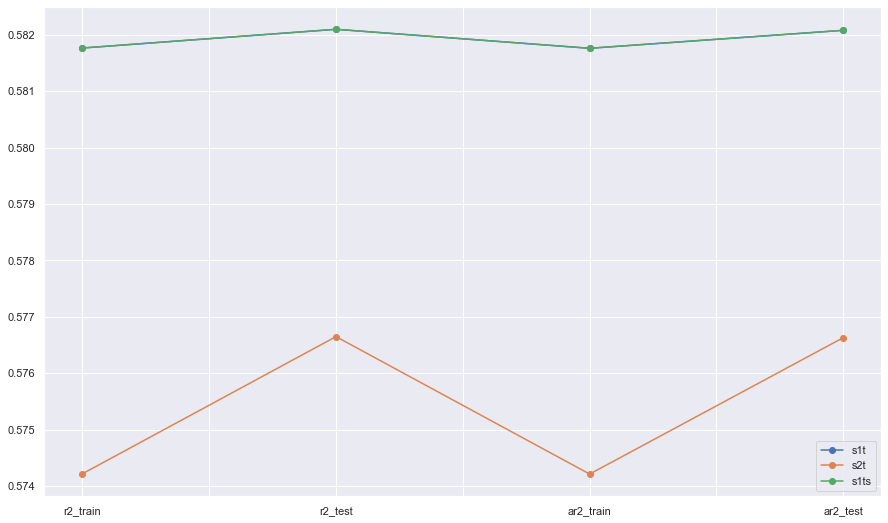

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.581765,0.574219,0.581765
r2_test,0.582097,0.576650,0.582097
ar2_train,0.581761,0.574214,0.581761
ar2_test,0.582079,0.576632,0.582079


### 2. Decision tree

In [ ]:
param_dt = {'max_depth' : [20, 25], 'min_samples_split' : [40, 60, 80]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]
  dt = DecisionTreeRegressor()
  dt_grid = GridSearchCV(estimator = dt, param_grid = param_dt, cv = 5, scoring = 'r2', n_jobs = 3)
  dt_grid.fit(X_train, Y_train)

  reg = dt_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {dt_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (13.93553867964529, 3.733033442074326, 0.7942095869479306, 0.7942073467210702)
Test scores = (18.088915270903577, 4.253106543563607, 0.7327314096836911, 0.7327197713889118)

Iteration s2t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (14.233932553209263, 3.7727884320763683, 0.7913118096298126, 0.7913095471472069)
Test scores = (18.481386235700274, 4.298998282821275, 0.7291147867003778, 0.7291030391748017)

Iteration s1ts:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (13.935538679645292, 3.7330334420743263, 0.7942095869479306, 0.7942073467210702)
Test scores = (18.09147735319899, 4.253407734181969, 0.7326935542283963, 0.7326819142851894)

CPU times: total: 33 s
Wall time: 7min 34s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 1
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

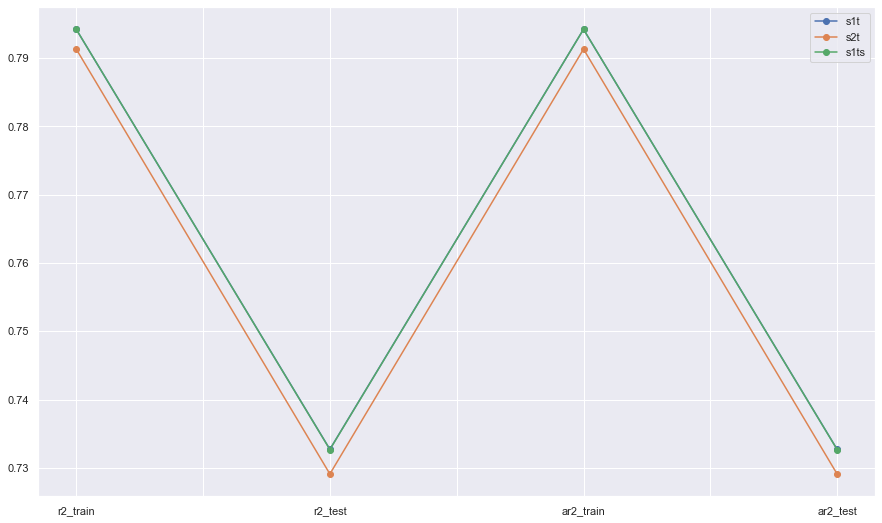

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.794210,0.791312,0.794210
r2_test,0.732731,0.729115,0.732694
ar2_train,0.794207,0.791310,0.794207
ar2_test,0.732720,0.729103,0.732682


### 3. Polynomial regression

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
    X_train, X_test, Y_train, Y_test = input_names[input]

    poly_reg = PolynomialFeatures(degree = 2)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    reg = LinearRegression()
    reg.fit(X_train_poly, Y_train)

    Y_train_pred = reg.predict(X_train_poly)
    Y_test_pred = reg.predict(X_test_poly)

    train_scores = evaluate_model(Y_train, Y_train_pred, X_train_poly)
    test_scores = evaluate_model(Y_test, Y_test_pred, X_test_poly)
    print(f'Iteration {input}:')
    print(f'Train scores = {train_scores}')
    print(f'Test scores = {test_scores}\n')

    for i, score in enumerate(score_names):
        if 'train' in score:
            scores[input][score].append(train_scores[i])
        elif 'test' in score:
            scores[input][score].append(test_scores[i-4])

Iteration s1t:
Train scores = (23.36903604381586, 4.834153084441561, 0.6549022114868133, 0.6548737209712038)
Test scores = (23.29246897670758, 4.8262271990352446, 0.6558475035590112, 0.6557338254033351)

Iteration s2t:
Train scores = (24.427415297752695, 4.942409867438424, 0.641861932754509, 0.6418324865715868)
Test scores = (24.360286181541536, 4.935614063269284, 0.6429466256389462, 0.6428291687760588)

Iteration s1ts:
Train scores = (23.36831876409689, 4.834078895104722, 0.654912803778438, 0.6548843141373049)
Test scores = (23.291990003063727, 4.826177576826585, 0.6558545805234766, 0.6557409047054161)

CPU times: total: 22.2 s
Wall time: 19.5 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 2
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

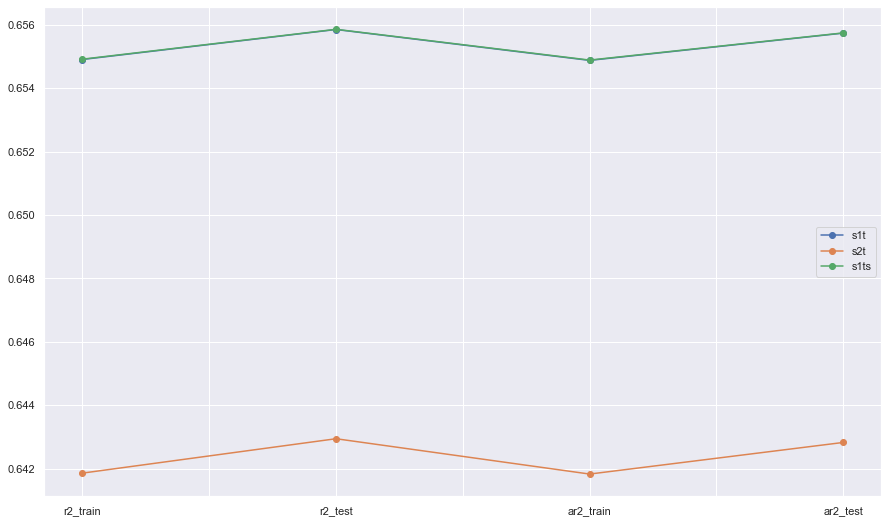

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.654902,0.641862,0.654913
r2_test,0.655848,0.642947,0.655855
ar2_train,0.654874,0.641832,0.654884
ar2_test,0.655734,0.642829,0.655741


### 4. Lasso

In [ ]:
param_lasso = {'alpha' : [0.00001, 0.001, 0.1, 1]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  lasso = Lasso()
  lasso_grid = GridSearchCV(estimator = lasso, param_grid = param_lasso, cv = 5, scoring = 'r2')
  lasso_grid.fit(X_train, Y_train)

  reg = lasso_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.321648289022445, 5.321808742243792, 0.5817654535144446, 0.5817609006285687)
Test scores = (28.28394530213746, 5.318265253081822, 0.5820970977930697, 0.5820789000798283)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.041150009528906, 5.3889841352085, 0.5742185078436883, 0.5742138917548807)
Test scores = (28.883450291468897, 5.374332543811268, 0.5766497440587077, 0.5766313845554378)

Iteration s1ts:
Best params = {'alpha': 1e-05}
Train scores = (28.321647543003635, 5.321808672153071, 0.5817654645311353, 0.5817609116453792)
Test scores = (28.283920669336023, 5.318262937213242, 0.5820974617493389, 0.5820792640519461)

CPU times: total: 45.9 s
Wall time: 26 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 3
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

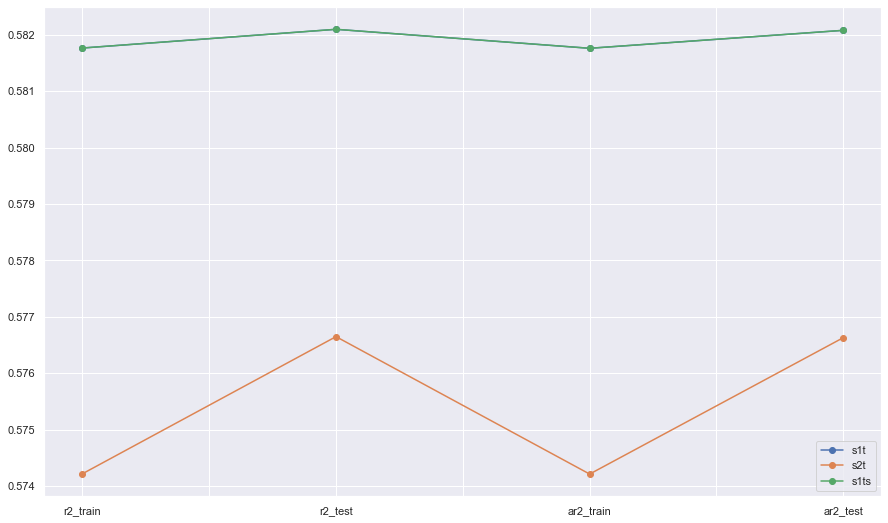

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.581765,0.574219,0.581765
r2_test,0.582097,0.576650,0.582097
ar2_train,0.581761,0.574214,0.581761
ar2_test,0.582079,0.576631,0.582079


### 5. Ridge

In [ ]:
param_ridge = {'alpha' : [0.000001, 0.00001, 0.001, 0.1, 1, 10]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  ridge = Ridge()
  ridge_grid = GridSearchCV(estimator = ridge, param_grid = param_ridge, cv = 5, scoring = 'r2')
  ridge_grid.fit(X_train, Y_train)

  reg = ridge_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.321647559914176, 5.3218086737418675, 0.5817654642814121, 0.5817609113956533)
Test scores = (28.28392329453365, 5.318263184022924, 0.5820974229613376, 0.5820792252622558)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.041149287059405, 5.388984068176431, 0.5742185184360424, 0.5742139023473496)
Test scores = (28.883416514762978, 5.374329401400977, 0.5766502391303474, 0.5766318796485475)

Iteration s1ts:
Best params = {'alpha': 1e-05}
Train scores = (28.32164754643899, 5.321808672475833, 0.5817654644804044, 0.5817609115946478)
Test scores = (28.283920572302996, 5.318262928090618, 0.582097463183028, 0.5820792654856977)

CPU times: total: 31.6 s
Wall time: 16.8 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 4
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

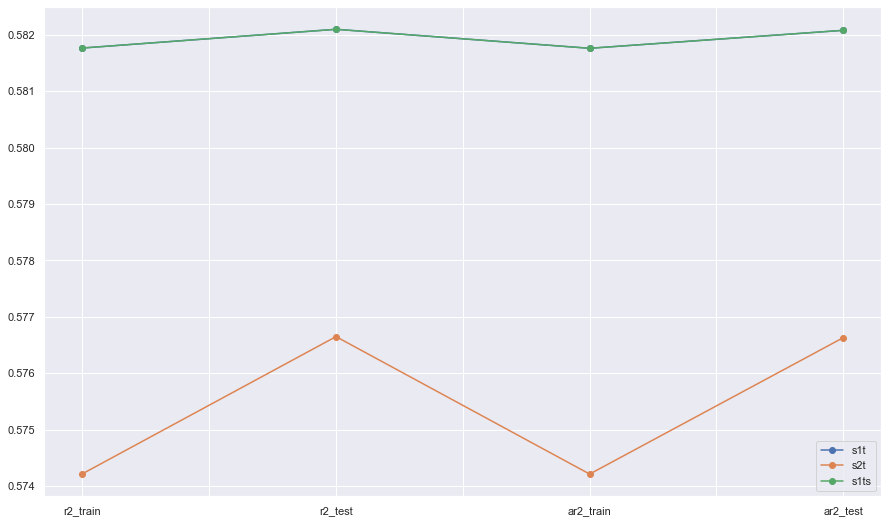

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.581765,0.574219,0.581765
r2_test,0.582097,0.576650,0.582097
ar2_train,0.581761,0.574214,0.581761
ar2_test,0.582079,0.576632,0.582079


### 6. ELastic Net

In [ ]:
param_elastic = {'alpha' : [0.00001, 0.001, 0.1, 10], 'l1_ratio' : [0.1, 0.5, 0.9]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  elastic = ElasticNet()
  elastic_grid = GridSearchCV(estimator = elastic, param_grid = param_elastic, cv = 5, scoring = 'r2')
  elastic_grid.fit(X_train, Y_train)

  reg = elastic_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {elastic_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (28.3216526348635, 5.321809150548665, 0.5817653893380647, 0.5817608364514901)
Test scores = (28.283992756200195, 5.318269714503035, 0.5820963966465243, 0.5820781989027513)

Iteration s2t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (29.041154030503584, 5.388984508282018, 0.5742184488909059, 0.5742138328014591)
Test scores = (28.883509771241563, 5.37433807749769, 0.5766488722523021, 0.5766305127112246)

Iteration s1ts:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.1}
Train scores = (28.3216475466802, 5.321808672498496, 0.5817654644768424, 0.5817609115910858)
Test scores = (28.28392071953832, 5.318262941933044, 0.5820974610075864, 0.5820792633101614)

CPU times: total: 2min 8s
Wall time: 1min 4s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 5
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

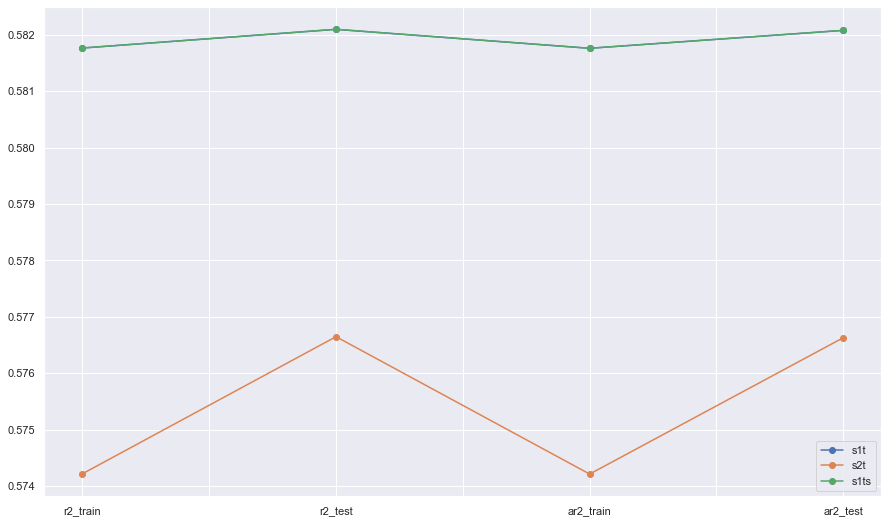

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.581765,0.574218,0.581765
r2_test,0.582096,0.576649,0.582097
ar2_train,0.581761,0.574214,0.581761
ar2_test,0.582078,0.576631,0.582079


### 7. XGBoost

In [ ]:
# param_xg = {'max_depth' : [20, 25], 'learning_rate' : [0.01, 0.1, 0.3], 'n_estimators' : [50, 100, 150]}

param_xg = {'max_depth' : [15], 'learning_rate' : [0.1], 'n_estimators' : [100]}

In [ ]:
%%time

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]
  xg = xgb.XGBRegressor()
  xg_grid = GridSearchCV(estimator = xg, param_grid = param_xg, cv = 5, scoring = 'r2', n_jobs = 3)
  xg_grid.fit(X_train, Y_train)

  reg = xg_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {xg_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (5.773533486432739, 2.4028178221481418, 0.9147404439644389, 0.9147395158320506)
Test scores = (12.79842055148928, 3.57748802255008, 0.8108998926777023, 0.8108916582540867)

Iteration s2t:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (5.822329228902244, 2.412950316293778, 0.9146369883391708, 0.9146360628803382)
Test scores = (13.151682373143071, 3.6265248342101657, 0.8072332757152211, 0.8072249159675768)

Iteration s1ts:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (5.821942277489347, 2.412870132744269, 0.9140255763632716, 0.914024640448861)
Test scores = (12.824226617925191, 3.581092936231227, 0.8105186011024673, 0.8105103500753902)

CPU times: total: 47min 27s
Wall time: 1h 21min 9s


In [ ]:
# Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 80}
# Train scores = (18696.025470614226, 136.733410220817, 0.9065004479694372, 0.9064994301367559)
# Test scores = (40295.50115847913, 200.73739352317776, 0.7983430099943146, 0.7983342287772954)

# CPU times: total: 10min 40s
# Wall time: 22min 14s

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 6
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

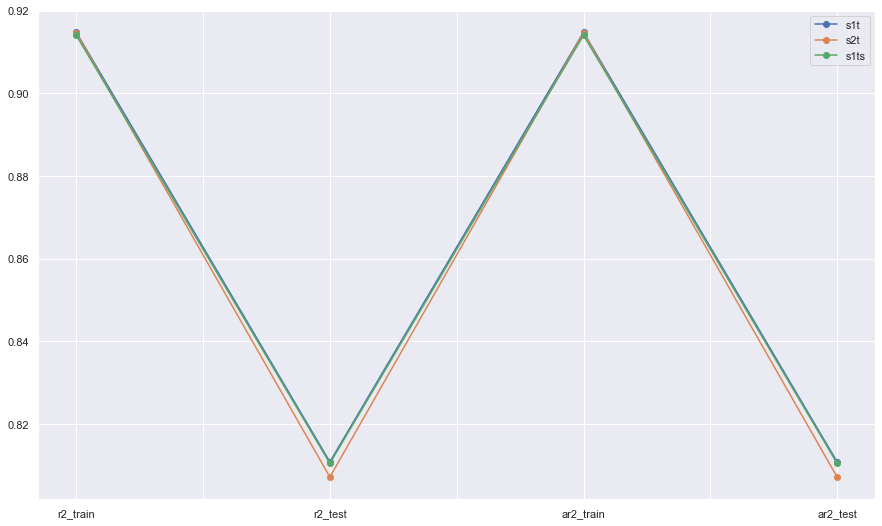

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.914740,0.914637,0.914026
r2_test,0.810900,0.807233,0.810519
ar2_train,0.914740,0.914636,0.914025
ar2_test,0.810892,0.807225,0.810510


## pickle

In [ ]:
import pickle

with open('scores_PWHS1010.pkl', 'wb') as f:
    pickle.dump(scores, f)

# with open('scores_PWHS0100.pkl', 'rb') as f:
#     scores = pickle.load(f)

In [ ]:
scores

{'s1t': {'mse_train': [28.321647541514633,
   13.93553867964529,
   23.36903604381586,
   28.321648289022445,
   28.321647559914176,
   28.3216526348635,
   5.773533486432739],
  'rmse_train': [5.321808672013175,
   3.733033442074326,
   4.834153084441561,
   5.321808742243792,
   5.3218086737418675,
   5.321809150548665,
   2.4028178221481418],
  'r2_train': [0.5817654645531238,
   0.7942095869479306,
   0.6549022114868133,
   0.5817654535144446,
   0.5817654642814121,
   0.5817653893380647,
   0.9147404439644389],
  'adj_r2_train': [0.5817609116673681,
   0.7942073467210702,
   0.6548737209712038,
   0.5817609006285687,
   0.5817609113956533,
   0.5817608364514901,
   0.9147395158320506],
  'mse_test': [28.283919117286796,
   18.088915270903577,
   23.29246897670758,
   28.28394530213746,
   28.28392329453365,
   28.283992756200195,
   12.79842055148928],
  'rmse_test': [5.318262791296308,
   4.253106543563607,
   4.8262271990352446,
   5.318265253081822,
   5.318263184022924,
   5.3

In [ ]:
# path2 = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE ROUGHS/#CAPSTONE REGRESSION/PWHS_1001.csv'

In [ ]:
dff = pd.DataFrame(scores['s1t']['r2_test'], index = model_names)
dff.rename(columns = {0 : 's1t'}, inplace = True)
for input in list(input_names.keys())[1:]:
  dff[input] = scores[input]['r2_test']
dff

,s1t,s2t,s1ts
Linear Regression,0.582097,0.576650,0.582097
Decision Tree,0.732731,0.729115,0.732694
Polynomial Regression,0.655848,0.642947,0.655855
Lasso,0.582097,0.576650,0.582097
Ridge,0.582097,0.576650,0.582097
Elastic Net,0.582096,0.576649,0.582097
XGBoost,0.810900,0.807233,0.810519


In [ ]:
dff.to_csv('PWHS_1010.csv')

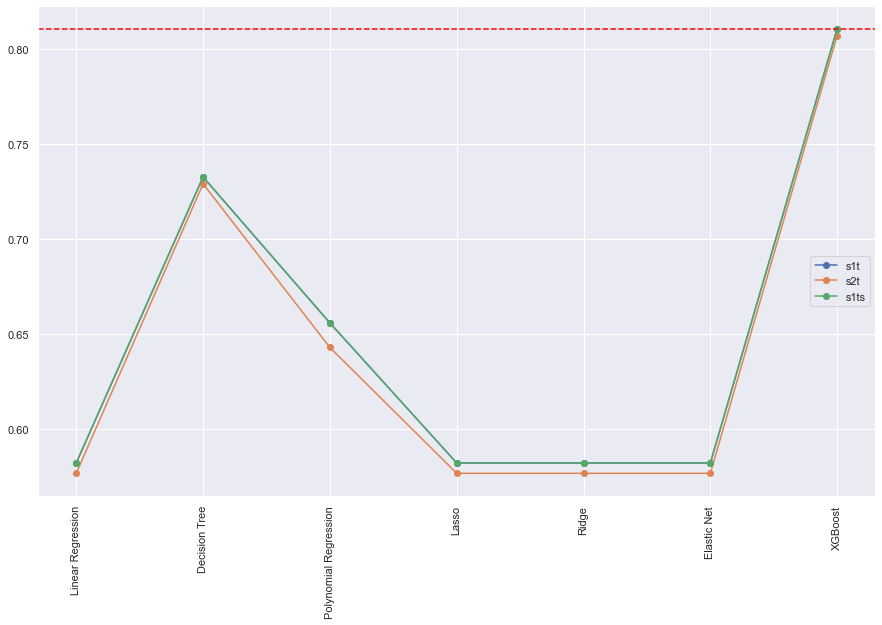

In [ ]:
for itr in dff.columns[:]:
  ax = dff[itr].plot(figsize = (15, 9), marker = 'o', title = None)
  plt.xticks(rotation = 90)
  plt.legend(bbox_to_anchor = (1, 0.5))
ax.axhline(dff.max().max(), color = 'red', linestyle = '--')